

```
# Question 2

```



In [4]:
import pandas as pd
import re

# --- Input Documents ---
# Document 1
doc1 = "I am a student, and I currently take MDS472C. I was a student in MDS331 last trimester."

# Document 2
doc2 = "I was a student. I have taken MDS472C."

# Combine documents into a list for easier processing
documents = [doc1, doc2]

# --- Preprocessing and Vocabulary Creation ---

# Preprocess each document: convert to lowercase, remove punctuation, and split into words
# Using a set gets only the unique words for each document
doc1_words = set(re.sub(r'[^\w\s]', '', doc1).lower().split())
doc2_words = set(re.sub(r'[^\w\s]', '', doc2).lower().split())

# Create a master vocabulary of all unique words from all documents, sorted alphabetically
vocabulary = sorted(list(doc1_words.union(doc2_words)))

# --- Build the Word Matrix ---

# Initialize a dictionary to hold the matrix data
word_matrix_data = {}

# Populate the matrix data for Doc1
word_matrix_data['Doc1'] = [1 if word in doc1_words else 0 for word in vocabulary]

# Populate the matrix data for Doc2
word_matrix_data['Doc2'] = [1 if word in doc2_words else 0 for word in vocabulary]

# --- Create and Display the DataFrame ---

# Create a pandas DataFrame from the dictionary
# The 'index' parameter sets the row labels
df_word_matrix = pd.DataFrame(word_matrix_data, index=vocabulary)

# Transpose the DataFrame so documents are rows and terms are columns, matching the example
df_word_matrix = df_word_matrix.T

# Print the final word matrix
print("Word Matrix for Doc 1 and Doc 2:")
print(df_word_matrix)

Word Matrix for Doc 1 and Doc 2:
      a  am  and  currently  have  i  in  last  mds331  mds472c  student  \
Doc1  1   1    1          1     0  1   1     1       1        1        1   
Doc2  1   0    0          0     1  1   0     0       0        1        1   

      take  taken  trimester  was  
Doc1     1      0          1    1  
Doc2     0      1          0    1  


Question 4

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!



Aligned Words:
Word A   : characterization
Word B   : c-a-tegorization
Opertn   : *d*dssss********

Step-by-Step Operations:
Match       : c
Delete      : h
Match       : a
Delete      : r
Substitute  : a -> t
Substitute  : c -> e
Substitute  : t -> g
Substitute  : e -> o
Match       : r
Match       : i
Match       : z
Match       : a
Match       : t
Match       : i
Match       : o
Match       : n

Summary Report:
Total Minimum Edit Distance : 6
Number of Insertions        : 0
Number of Deletions         : 2
Number of Substitutions     : 4
Number of Matches           : 10


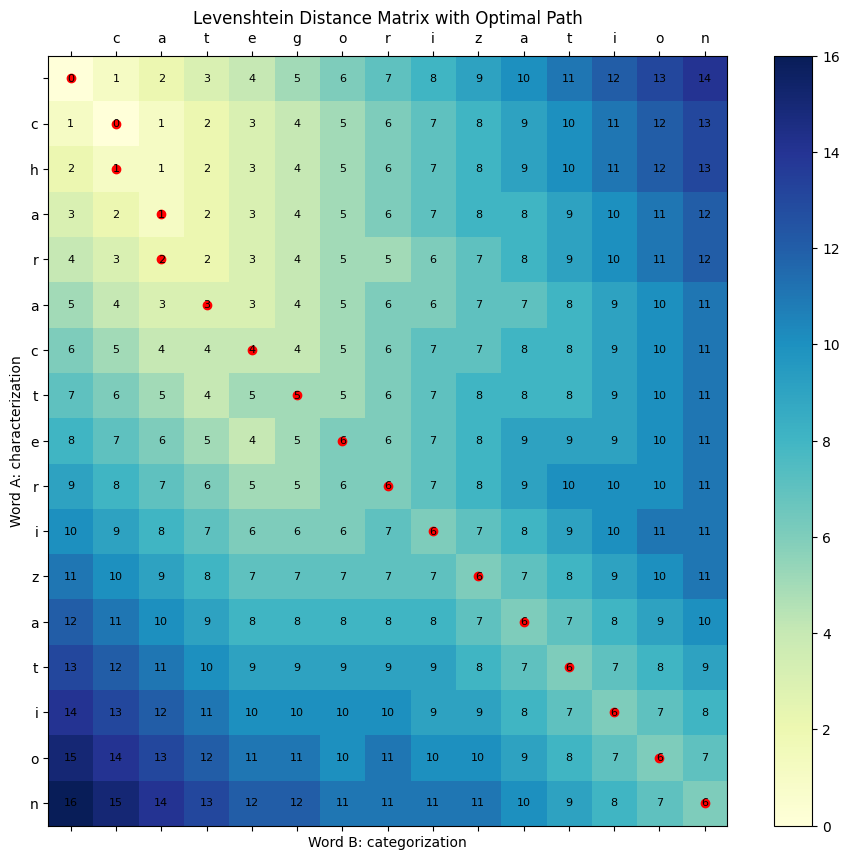

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk

# Download tokenizer (used by NLTK functions if needed)
nltk.download('punkt')

def full_nltk_levenshtein(wordA, wordB):
    lenA, lenB = len(wordA), len(wordB)
    dp = np.zeros((lenA + 1, lenB + 1), dtype=int)

    # Initialize DP matrix
    for i in range(lenA + 1):
        dp[i][0] = i
    for j in range(lenB + 1):
        dp[0][j] = j

    # Fill the matrix
    for i in range(1, lenA + 1):
        for j in range(1, lenB + 1):
            cost = 0 if wordA[i - 1] == wordB[j - 1] else 1
            dp[i][j] = min(
                dp[i - 1][j] + 1,
                dp[i][j - 1] + 1,
                dp[i - 1][j - 1] + cost
            )

    # Backtrace path
    i, j = lenA, lenB
    path = [(i, j)]
    ops = []
    alignedA, alignedB, op_seq = [], [], []

    insertions = deletions = substitutions = matches = 0

    while i > 0 or j > 0:
        if i > 0 and j > 0 and dp[i][j] == dp[i - 1][j - 1] + (wordA[i - 1] != wordB[j - 1]):
            alignedA.append(wordA[i - 1])
            alignedB.append(wordB[j - 1])
            path.append((i - 1, j - 1))
            if wordA[i - 1] == wordB[j - 1]:
                op_seq.append('*')
                ops.append(f"Match       : {wordA[i - 1]}")
                matches += 1
            else:
                op_seq.append('s')
                ops.append(f"Substitute  : {wordA[i - 1]} -> {wordB[j - 1]}")
                substitutions += 1
            i -= 1
            j -= 1
        elif i > 0 and dp[i][j] == dp[i - 1][j] + 1:
            alignedA.append(wordA[i - 1])
            alignedB.append('-')
            path.append((i - 1, j))
            op_seq.append('d')
            ops.append(f"Delete      : {wordA[i - 1]}")
            deletions += 1
            i -= 1
        else:
            alignedA.append('-')
            alignedB.append(wordB[j - 1])
            path.append((i, j - 1))
            op_seq.append('i')
            ops.append(f"Insert      : {wordB[j - 1]}")
            insertions += 1
            j -= 1

    # Reverse alignments and operations
    path.reverse()
    ops.reverse()
    alignedA.reverse()
    alignedB.reverse()
    op_seq.reverse()

    # Print Outputs
    print("\nAligned Words:")
    print("Word A   :", ''.join(alignedA))
    print("Word B   :", ''.join(alignedB))
    print("Opertn   :", ''.join(op_seq))

    print("\nStep-by-Step Operations:")
    for step in ops:
        print(step)

    print("\nSummary Report:")
    print("Total Minimum Edit Distance :", dp[lenA][lenB])
    print("Number of Insertions        :", insertions)
    print("Number of Deletions         :", deletions)
    print("Number of Substitutions     :", substitutions)
    print("Number of Matches           :", matches)

    # Return matrix and path for plotting
    df = pd.DataFrame(dp, index=[" "] + list(wordA), columns=[" "] + list(wordB))
    return df, path

def plot_path(dp_df, path, wordA, wordB):
    fig, ax = plt.subplots(figsize=(12, 10))
    mat = ax.matshow(dp_df.values, cmap="YlGnBu")
    plt.colorbar(mat)

    ax.set_xticks(range(len(dp_df.columns)))
    ax.set_yticks(range(len(dp_df.index)))
    ax.set_xticklabels(dp_df.columns)
    ax.set_yticklabels(dp_df.index)

    for i in range(len(dp_df.index)):
        for j in range(len(dp_df.columns)):
            ax.text(j, i, str(dp_df.iat[i, j]), va='center', ha='center', fontsize=8)

    for i, j in path:
        ax.plot(j, i, 'ro')

    ax.set_title("Levenshtein Distance Matrix with Optimal Path")
    plt.xlabel("Word B: " + wordB)
    plt.ylabel("Word A: " + wordA)
    plt.show()

# === Run the Full Analysis ===
wordA = "characterization"
wordB = "categorization"

matrix, path = full_nltk_levenshtein(wordA, wordB)
plot_path(matrix, path, wordA, wordB)


In [7]:
import nltk
from nltk.corpus import wordnet as wn
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import sys # Used to redirect output for cleaner display

# --- Download required NLTK data ---
# This is done once to get tokenizers, taggers, WordNet, and stopwords.
try:
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('taggers/averaged_perceptron_tagger')
    nltk.data.find('corpora/wordnet')
    nltk.data.find('corpora/stopwords')
except nltk.downloader.DownloadError:
    print("Downloading necessary NLTK data...", file=sys.stderr)
    nltk.download('punkt', quiet=True)
    nltk.download('averaged_perceptron_tagger', quiet=True)
    nltk.download('wordnet', quiet=True)
    nltk.download('stopwords', quiet=True)
    print("Downloads complete.", file=sys.stderr)


# --- Sample Corpus ---
# A small corpus from newspaper-style sentences with ambiguous words.
corpus = [
    "The bank will issue a new credit card.",
    "He sat on the river bank and watched the boats.",
    "The cricket match was a draw.",
    "Please draw a line on the paper with a pen."
]

# Get English stopwords
stop_words = set(stopwords.words('english'))

print("Corpus Sentences:")
for i, sentence in enumerate(corpus):
    print(f"{i+1}: {sentence}")

AttributeError: module 'nltk.downloader' has no attribute 'DownloadError'

In [11]:
import nltk
from nltk.corpus import wordnet as wn
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import sys

# --- 1. Corpus and Setup (Corrected) ---
# This block now correctly handles missing NLTK data.
try:
    # Check if the required resources are available
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('taggers/averaged_perceptron_tagger')
    nltk.data.find('corpora/wordnet')
    nltk.data.find('corpora/stopwords')
except LookupError: # Corrected exception type
    print("Downloading necessary NLTK data...", file=sys.stderr)
    nltk.download('punkt_tab', quiet=True)
    nltk.download('averaged_perceptron_tagger_eng')
    nltk.download('averaged_perceptron_tagger', quiet=True)
    nltk.download('wordnet', quiet=True)
    nltk.download('stopwords', quiet=True)
    print("Downloads complete.", file=sys.stderr)

# Sample Corpus
corpus = [
    "The bank will issue a new credit card.",
    "He sat on the river bank and watched the boats.",
    "The cricket match was a draw.",
    "Please draw a line on the paper with a pen."
]
stop_words = set(stopwords.words('english'))

print("Corpus Sentences:")
for i, sentence in enumerate(corpus):
    print(f"{i+1}: {sentence}")

# --- 2. Word Sense Count ---

def get_wordnet_pos(treebank_tag):
    """Maps treebank POS tags to WordNet POS tags."""
    if treebank_tag.startswith('J'):
        return wn.ADJ
    elif treebank_tag.startswith('V'):
        return wn.VERB
    elif treebank_tag.startswith('N'):
        return wn.NOUN
    elif treebank_tag.startswith('R'):
        return wn.ADV
    else:
        return None

print("\n" + "="*50)
print("Sense Counts for Open-Class Words")
print("="*50)

for sentence in corpus:
    print(f"\nSENTENCE: \"{sentence}\"")
    tagged_words = nltk.pos_tag(word_tokenize(sentence))

    for word, tag in tagged_words:
        wn_pos = get_wordnet_pos(tag)
        if wn_pos and word.lower() not in stop_words:
            sense_count = len(wn.synsets(word.lower(), pos=wn_pos))
            if sense_count > 0:
                print(f"  - Word: '{word}' ({tag}), Senses: {sense_count}")

# --- 3. Lesk Algorithm Implementation ---

def simple_lesk(word, sentence):
    """A simplified Lesk algorithm implementation."""
    best_sense = None
    max_overlap = 0
    context = set(word_tokenize(sentence.lower())).difference(stop_words)
    synsets = wn.synsets(word)

    if not synsets:
        return None
    best_sense = synsets[0]

    for sense in synsets:
        signature = set(word_tokenize(sense.definition()))
        for example in sense.examples():
            signature.update(word_tokenize(example))
        signature = signature.difference(stop_words)

        overlap = len(context.intersection(signature))

        if overlap > max_overlap:
            max_overlap = overlap
            best_sense = sense

    return best_sense

print("\n" + "="*50)
print("Lesk Algorithm Implementation Ready")
print("="*50)

# --- 4. Disambiguating and Tagging the Corpus ---

print("\n" + "="*50)
print("WSD Results: Tagging Corpus with Lesk Algorithm")
print("="*50)

for sentence in corpus:
    print(f"\nANALYZING: \"{sentence}\"")
    tagged_words = nltk.pos_tag(word_tokenize(sentence))

    for word, tag in tagged_words:
        if get_wordnet_pos(tag) and word.lower() not in stop_words:
            sense = simple_lesk(word.lower(), sentence)
            if sense:
                print(f"\n  Word: '{word}'")
                print(f"  Predicted Sense: {sense.name()}")
                print(f"  Definition: {sense.definition()}")
            else:
                print(f"\n  Word: '{word}' - No sense found.")

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
Downloads complete.


Corpus Sentences:
1: The bank will issue a new credit card.
2: He sat on the river bank and watched the boats.
3: The cricket match was a draw.
4: Please draw a line on the paper with a pen.

Sense Counts for Open-Class Words

SENTENCE: "The bank will issue a new credit card."
  - Word: 'bank' (NN), Senses: 10
  - Word: 'issue' (VB), Senses: 5
  - Word: 'new' (JJ), Senses: 11
  - Word: 'credit' (NN), Senses: 9
  - Word: 'card' (NN), Senses: 11

SENTENCE: "He sat on the river bank and watched the boats."
  - Word: 'sat' (VBD), Senses: 10
  - Word: 'river' (NN), Senses: 1
  - Word: 'bank' (NN), Senses: 10
  - Word: 'watched' (VBD), Senses: 7
  - Word: 'boats' (NNS), Senses: 2

SENTENCE: "The cricket match was a draw."
  - Word: 'cricket' (NN), Senses: 2
  - Word: 'match' (NN), Senses: 9
  - Word: 'draw' (NN), Senses: 9

SENTENCE: "Please draw a line on the paper with a pen."
  - Word: 'draw' (VB), Senses: 36
  - Word: 'line' (NN), Senses: 30
  - Word: 'paper' (NN), Senses: 7
  - Word: 'p